In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline

In [2]:
# Load dataset
keystroke_data = pd.read_csv("keystroke_features.csv")

In [3]:
# Exploratory Data Analysis (EDA)
print(keystroke_data.info())
print(keystroke_data.describe())
print(keystroke_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748174 entries, 0 to 748173
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Id                    748174 non-null  int64  
 1   StartTime             748174 non-null  int64  
 2   KeyPressed            625140 non-null  object 
 3   FullWord              747990 non-null  object 
 4   EndTime               748174 non-null  int64  
 5   FlightTime            748173 non-null  float64
 6   KeyHoldTime           748174 non-null  int64  
 7   DeviceId              748174 non-null  object 
 8   CreatedAt             748174 non-null  object 
 9   ModifiedAt            748174 non-null  object 
 10  DwellTime             748174 non-null  int64  
 11  BigramFrequency       748174 non-null  int64  
 12  Entropy               748174 non-null  float64
 13  KeyPressSpeed         748173 non-null  float64
 14  MarkovTransitionProb  748174 non-null  float64
dtype

C:\Users\HP 430 G8\AppData\Local\Temp\ipykernel_2248\3551669116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DeviceId', data=keystroke_data, palette='viridis')


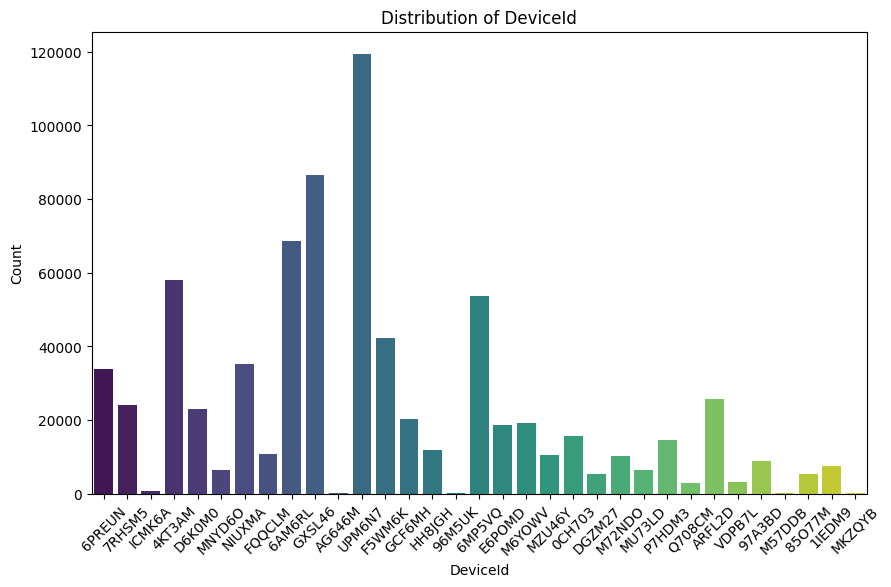

In [4]:
# Check class balance
# Plot the distribution of DeviceId
plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceId', data=keystroke_data, palette='viridis')
plt.title('Distribution of DeviceId')
plt.xlabel('DeviceId')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Convert categorical to numerical if necessary
if 'DeviceId' in keystroke_data.columns:
    le = LabelEncoder()
    keystroke_data['DeviceId'] = le.fit_transform(keystroke_data['DeviceId'])

if 'KeyPressed' in keystroke_data.columns:
    le = LabelEncoder()
    keystroke_data['KeyPressed'] = le.fit_transform(keystroke_data['KeyPressed'])

if 'FullWord' in keystroke_data.columns:
    le = LabelEncoder()
    keystroke_data['FullWord'] = le.fit_transform(keystroke_data['FullWord'])

C:\Users\HP 430 G8\AppData\Local\Temp\ipykernel_2248\3551669116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DeviceId', data=keystroke_data, palette='viridis')


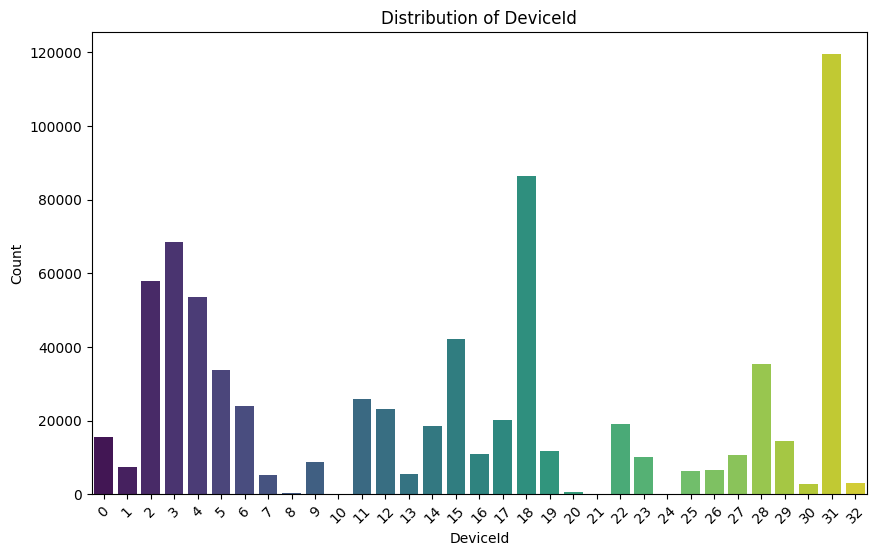

In [6]:
# Check class balance
# Plot the distribution of DeviceId
plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceId', data=keystroke_data, palette='viridis')
plt.title('Distribution of DeviceId')
plt.xlabel('DeviceId')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Define features and target
X = keystroke_data.drop(columns=['DeviceId', 'Id', 'CreatedAt', 'ModifiedAt'])  # Drop non-relevant columns
y = keystroke_data['DeviceId']  # Assuming 'Intruder' is the target

In [8]:
X = X.fillna(0)

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
# Apply SMOTE if data is imbalanced
if y_train.value_counts().min() / y_train.value_counts().max() < 0.5:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

In [11]:
# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    
    '''
    # Plot ROC Curve for each class
    for i in range(y_prob.shape[1]):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"{name} class {i} (AUC = {auc(fpr, tpr):.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    

    # AUROC Score for each class
    for i in range(y_prob.shape[1]):
        print(f"{name} AUROC Score for class {i}: {roc_auc_score(y_test[:, i], y_prob[:, i]):.4f}")
    '''

KeyboardInterrupt: 